# Introduction

In this notebook, we explore three distinct gradient descent optimization approaches: batch, stochastic, and mini-batch gradient descent, aimed at determining the best-fit line for a given dataset. We will define separate functions for each optimization method, allowing us to visualize the step-by-step optimization process. With batch gradient descent, it will allow us to compute gradients using the entire dataset, displaying the iterative refinement of the linear function. Conversely, stochastic gradient descent randomly selects individual data points for gradient computation, resulting in a more erratic yet faster convergence pattern. Lastly, the mini-batch gradient descent operates on data subsets (batches), striking a balance between the previous two methods.

If you're interested in exploring similar data analysis or learning more about AI applications, then checkout my personal website https://hughiephan.co . Don't forget to upvote if you found the notebook insightful or helpful. Your feedback is valuable and can help others discover useful content.

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cost and Gradient Functions

We define a cost function and a gradient function used in optimization processes. The cost function computes the mean squared error between the predicted values (based on given theta values and input data) and the actual target values. Meanwhile, the gradient function calculates the gradients (derivatives) of the cost function with respect to the parameters `theta0` and `theta1`. These gradients are essential in optimization algorithms like gradient descent, indicating the direction and magnitude of changes needed to minimize the cost function.

In [2]:
def cost_function(theta0, theta1):
    return np.mean((y - (theta0 + theta1 * X)) ** 2)

def gradient(theta0, theta1, X, y):
    grad_theta0 = -2 * np.mean(y - (theta0 + theta1 * X))
    grad_theta1 = -2 * np.mean((y - (theta0 + theta1 * X)) * X)
    return grad_theta0, grad_theta1

# Generate data points

Then we initiate a random number generator with a fixed seed and establish a dataset. Then we generate 10 samples of X values ranging from 0 to 10 and calculate associated y values based on a linear equation incorporating random noise using a normal distribution with a mean of 0 and a standard deviation of 1. Additionally, we set the learning rate (eta) for an optimization algorithm and define the maximum number of iterations for the algorithm to execute.

In [3]:
np.random.seed(42)
samples = 10
X = np.linspace(0, 10, samples)
y = 2 * X + np.random.normal(0, 1, size=samples)
eta = 0.01  # Learning rate
max_iterations = 5

# Batch Gradient Descent

Now let's create a new `batch_gradient_descent` function to execute the batch gradient descent optimization algorithm. This function conducts a specified number of iterations `max_iterations`, iteratively updating parameters `theta0` and `theta1` for a linear model using gradients computed via the gradient function. Throughout each iteration, we collect and store the cost values while generating visualizations. These visualizations portray the dataset's data points, the evolving line that represents the linear model, and the cost's progression across iterations via scatter and line plots. Eventually, this function returns the recorded cost values following the completion of batch gradient descent optimization, leveraging the provided learning rate (eta) and maximum iterations.

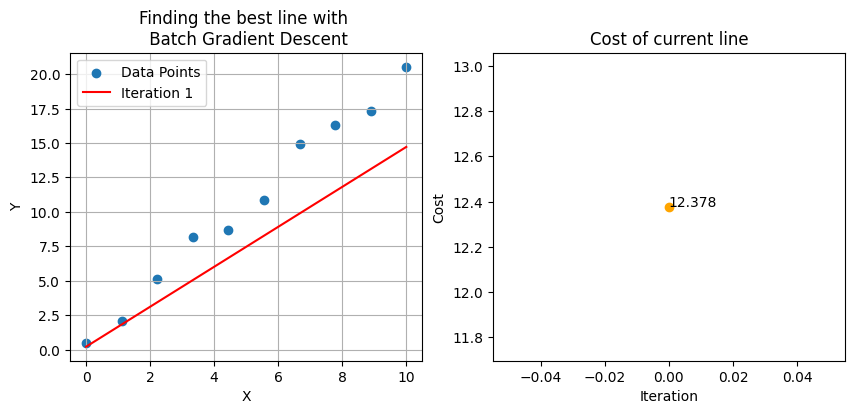

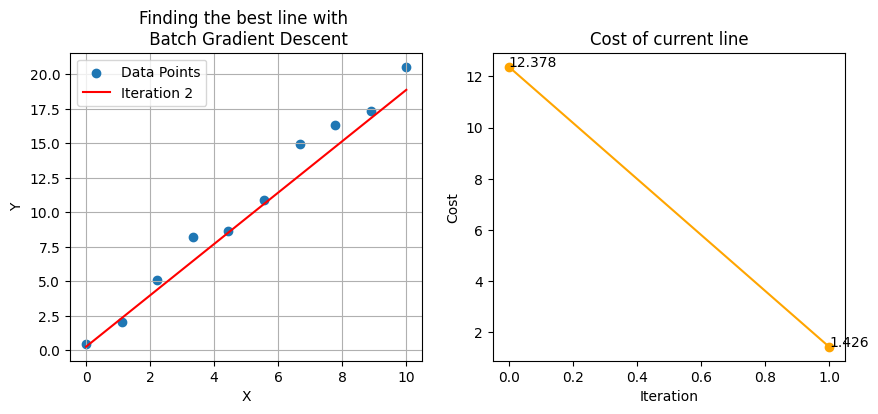

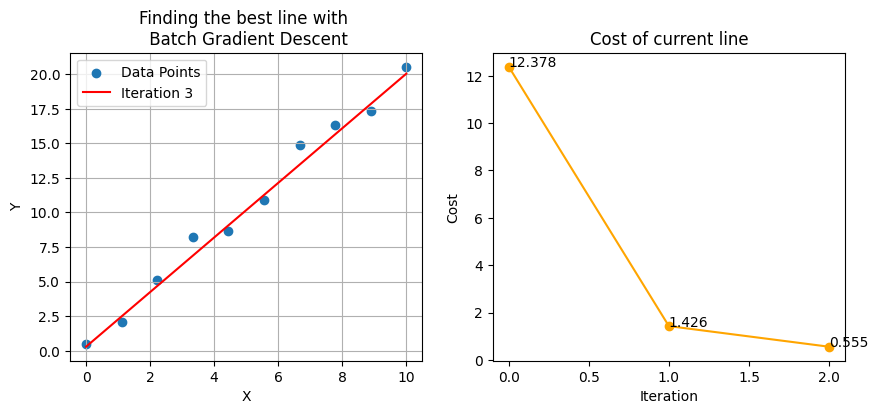

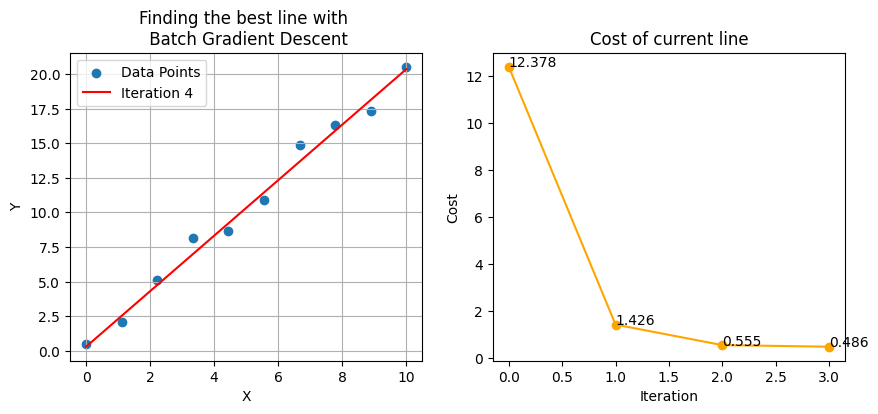

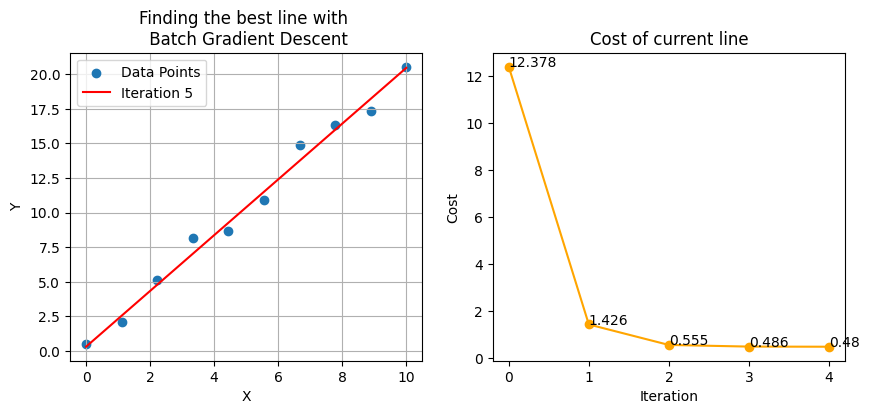

In [4]:
def batch_gradient_descent(eta, max_iterations):
    theta0 = 0.0  # Initial intercept
    theta1 = 0.0  # Initial slope
    cost_values = []
    for iteration in range(max_iterations):
        # Computing Gradient
        grad_theta0, grad_theta1 = gradient(theta0, theta1, X, y)
        theta0 -= eta * grad_theta0
        theta1 -= eta * grad_theta1
        cost_values.append(cost_function(theta0, theta1))
        plt.figure(figsize=(10, 4))
        # Feature vs Target
        plt.subplot(121)
        plt.scatter(X, y, label='Data Points')
        plt.plot(X, theta0 + theta1 * X, color='red', label=f'Iteration {iteration+1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Finding the best line with \n Batch Gradient Descent')
        plt.grid(True)
        plt.legend()
        # Cost vs Iteration
        plt.subplot(122)
        plt.scatter(np.arange(0, len(cost_values), dtype=int), cost_values, color='orange')
        for i, v in enumerate(cost_values):
            plt.text(i, v, np.round(v, 3))
        plt.plot(cost_values, color='orange')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost of current line')
        plt.show()
    return cost_values

cost_bgd = batch_gradient_descent(eta, max_iterations)

# Stochastic Gradient Descent

A bit similar to the Batch Gradient Descent, now we will create a new function named `stochastic_gradient_descent` responsible for executing the stochastic gradient descent optimization algorithm. This function runs a specified number of iterations (max_iterations), randomly selecting individual data points from the dataset for each iteration. It computes gradients for these randomly chosen points using the gradient function, updating the parameters `theta0` and `theta1` of a linear model. The main difference is that Batch gradient descent updates parameters using the entire dataset per iteration, ensuring stable convergence but being computationally expensive while Stochastic gradient descent (SGD) updates parameters with individual data points randomly, being computationally more efficient but leading to noisier convergence due to its stochastic nature.

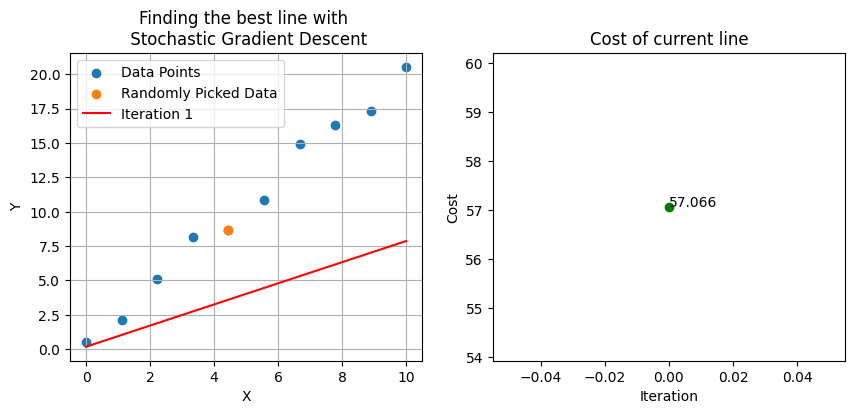

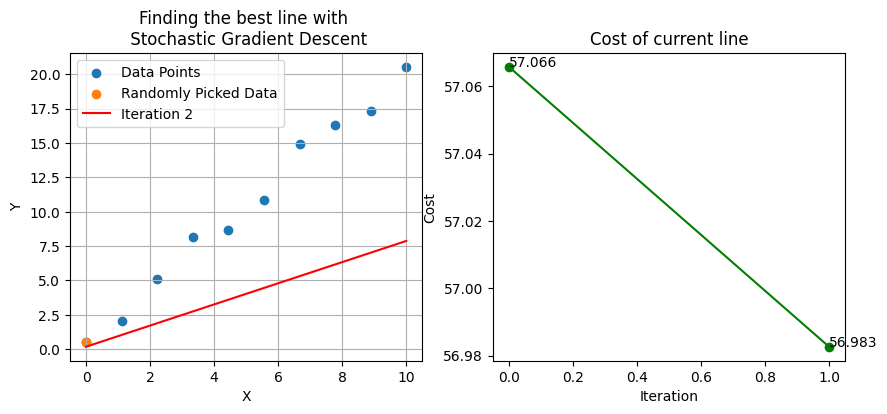

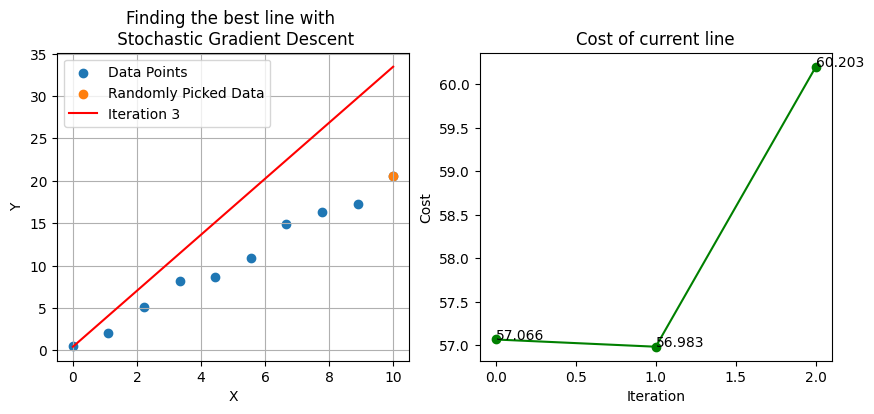

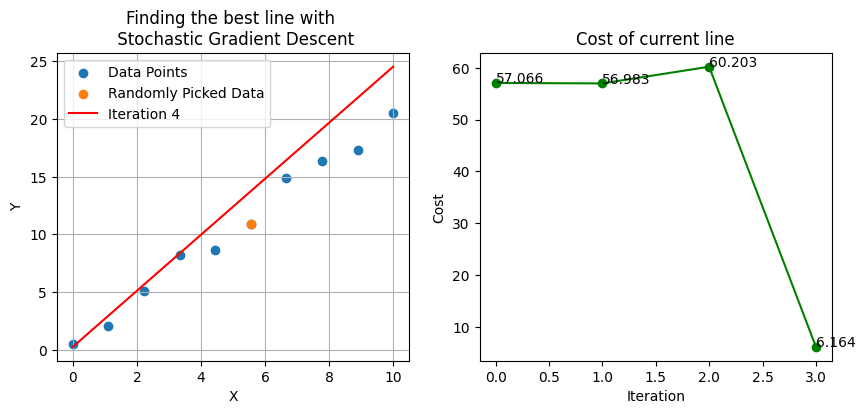

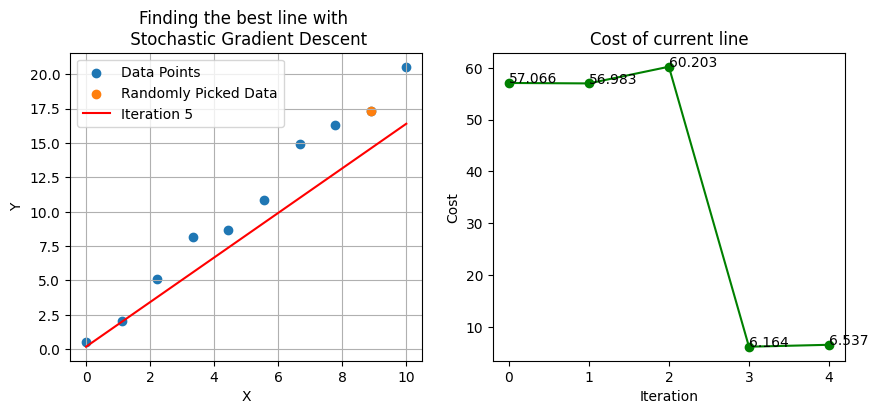

In [5]:
def stochastic_gradient_descent(eta, max_iterations):
    theta0 = 0.0  # Initial intercept
    theta1 = 0.0  # Initial slope
    cost_values = []
    for iteration in range(max_iterations):
        idx = np.random.randint(0, samples)  
        x_i = X[idx]
        y_i = y[idx]
        grad_theta0, grad_theta1 = gradient(theta0, theta1, x_i, y_i)
        theta0 -= eta * grad_theta0
        theta1 -= eta * grad_theta1
        cost_values.append(cost_function(theta0, theta1))
        plt.figure(figsize=(10, 4))
        # Feature vs Target
        plt.subplot(121)
        plt.scatter(X, y, label='Data Points')
        plt.scatter(x_i, y_i, label='Randomly Picked Data')
        plt.plot(X, theta0 + theta1 * X, color='red', label=f'Iteration {iteration+1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Finding the best line with \n Stochastic Gradient Descent')
        plt.grid(True)
        plt.legend()
        # Cost vs Iteration
        plt.subplot(122)
        plt.scatter(np.arange(0, len(cost_values), dtype=int), cost_values, color='green')
        for i, v in enumerate(cost_values):
            plt.text(i, v, np.round(v, 3))
        plt.plot(cost_values, color='green')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost of current line')
        plt.show()
    return cost_values

cost_sgd = stochastic_gradient_descent(eta, max_iterations)

# Mini-batch Gradient Descent
Comparing to Batch and Stochastic, the mini-batch Gradient Descent strikes a balance by splitting the dataset into smaller subsets (batches) and updates parameters based on each batch per iteration. This method combines benefits from both batch and stochastic gradient descent, offering computational efficiency and a balance between convergence stability and faster convergence rates compared to the batch method.

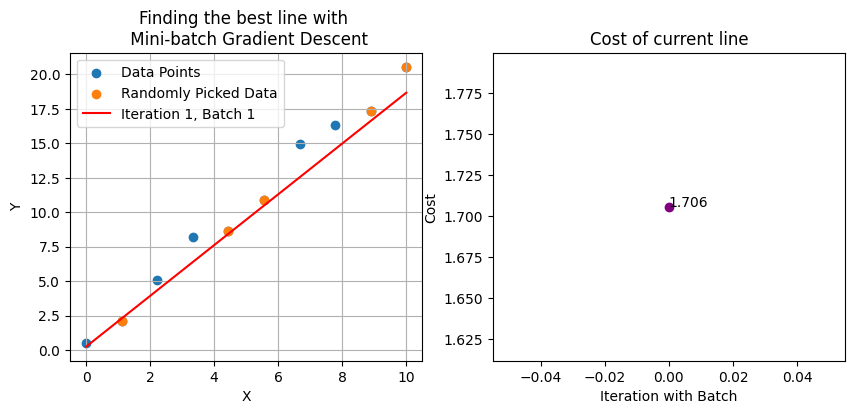

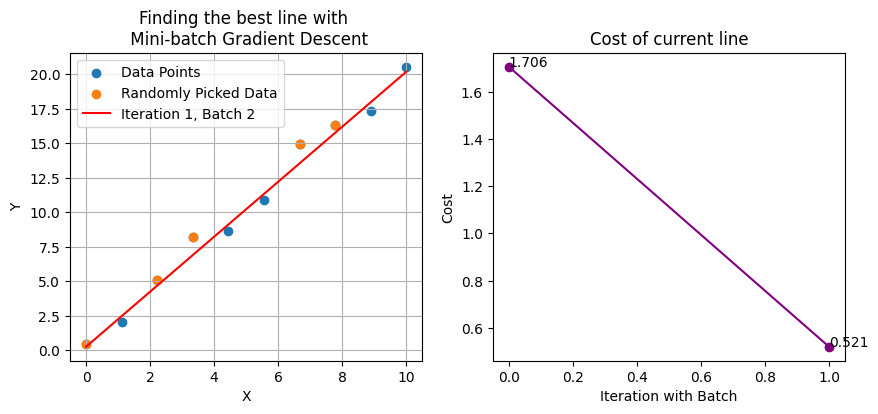

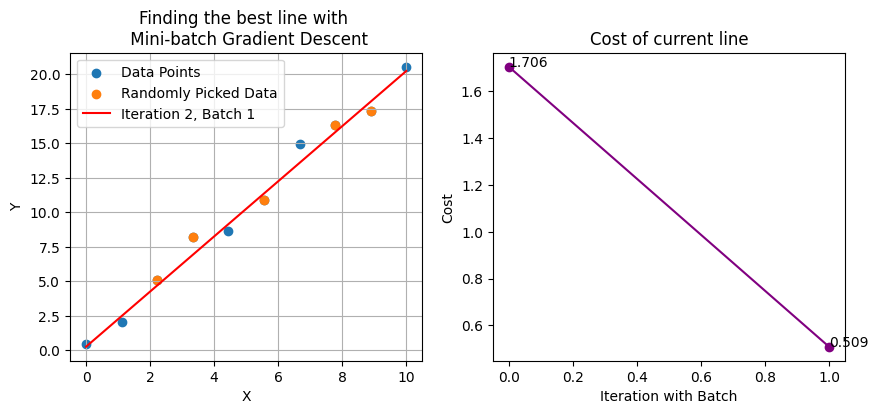

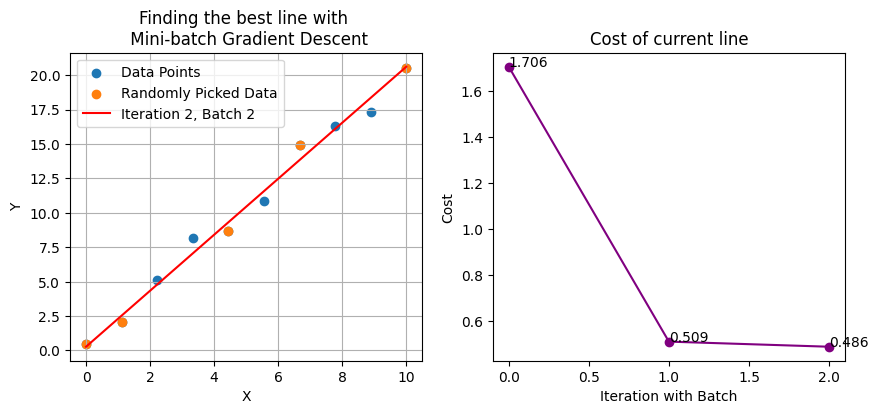

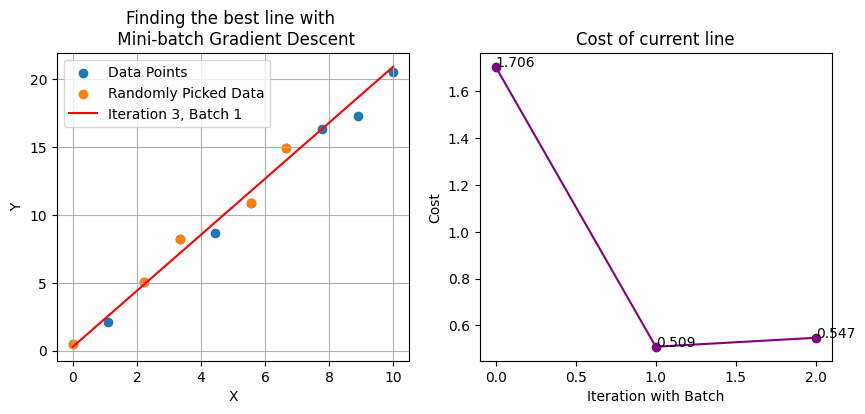

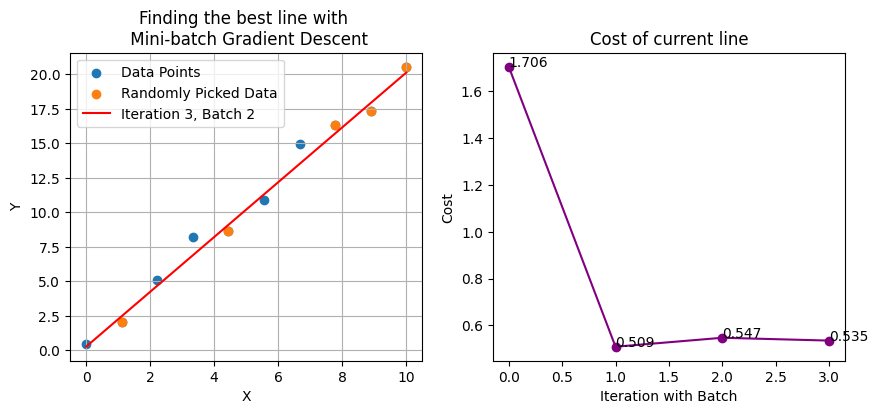

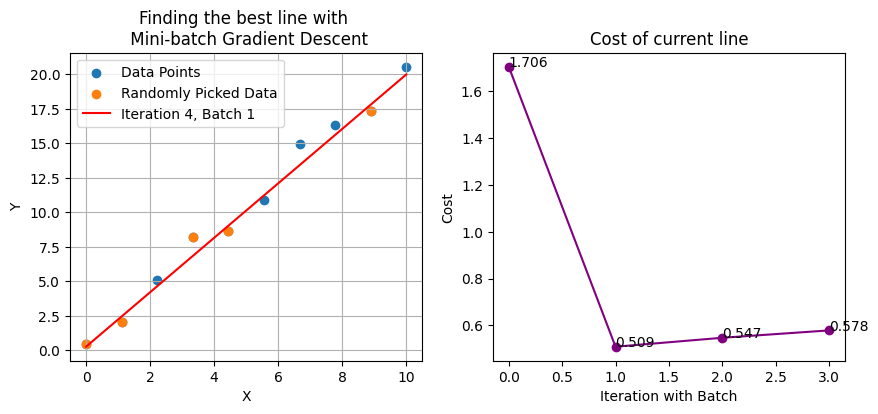

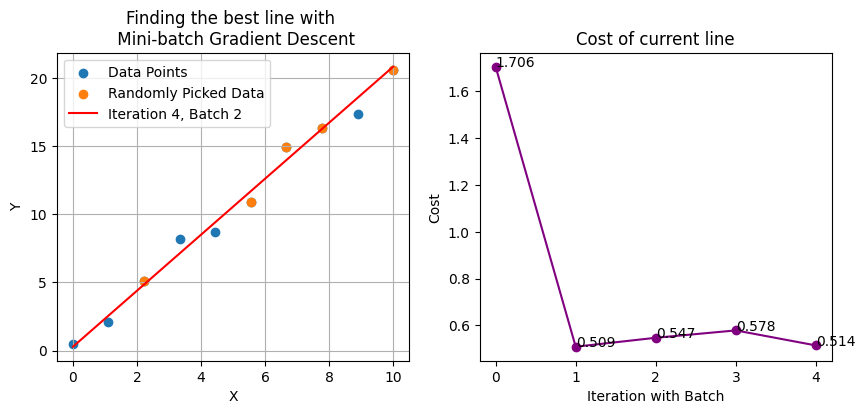

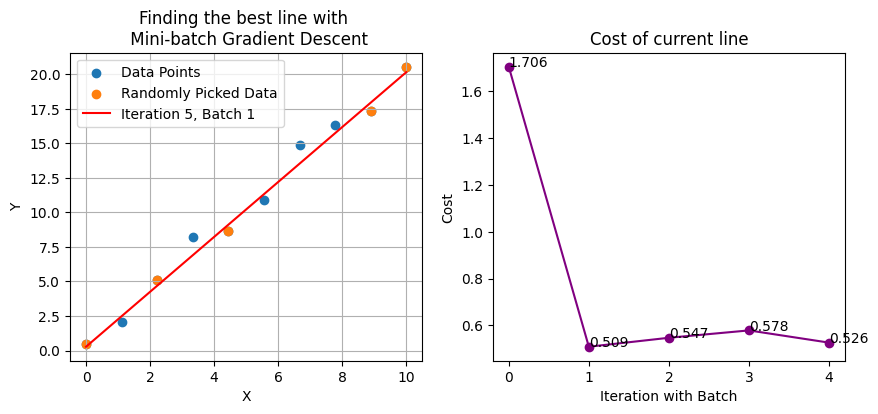

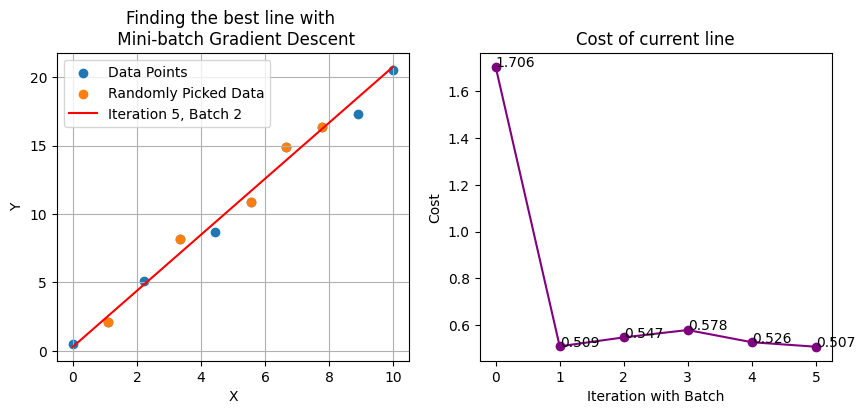

In [6]:
def minibatch_gradient_descent(eta, max_iterations):
    theta0 = 0.0  # Initial intercept
    theta1 = 0.0  # Initial slope
    batch_size = 5 # If you set Batch_Size = Numer_of_samples, this will become Gradient Descent
    num_batches = samples // batch_size
    cost_values = []
    cost_values_of_batch = []
    for iteration in range(max_iterations):
        # Computing Gradient
        permutation = np.random.permutation(samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        for batch in range(num_batches):
            start = batch * batch_size
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            grad_theta0, grad_theta1 = gradient(theta0, theta1, X_batch, y_batch)
            theta0 -= eta * grad_theta0
            theta1 -= eta * grad_theta1
            cost_values_of_batch.append(cost_function(theta0, theta1))
            plt.figure(figsize=(10, 4))
            # Feature vs Target
            plt.subplot(121)
            plt.scatter(X, y, label='Data Points')
            plt.scatter(X_batch, y_batch, label='Randomly Picked Data')
            plt.plot(X, theta0 + theta1 * X, color='red', label=f'Iteration {iteration+1}, Batch {batch+1}')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Finding the best line with \n Mini-batch Gradient Descent')
            plt.grid(True)
            plt.legend()
            # Cost vs Iteration
            plt.subplot(122)
            plt.scatter(np.arange(0, len(cost_values_of_batch), dtype=int), cost_values_of_batch, color='purple')
            for i, v in enumerate(cost_values_of_batch):
                plt.text(i, v, np.round(v, 3))
            plt.plot(cost_values_of_batch, color='purple')
            plt.xlabel('Iteration with Batch')
            plt.ylabel('Cost')
            plt.title('Cost of current line')
            plt.show()
        cost_values.append(cost_values_of_batch.pop()) # Get the cost in the final batch of that iteration
    return cost_values

cost_mbgd = minibatch_gradient_descent(eta, max_iterations)

# Batch vs Stochastic vs Mini-batch 
Finally, we generate a single plot comparing the cost evolution across iterations for batch, stochastic, and mini-batch gradient descent methods. Each method's cost values are depicted using distinct colors—orange for batch, green for stochastic, and purple for mini-batch. The plot includes a legend indicating each method's line color, facilitating easy identification. With the x-axis representing the iterations and the y-axis displaying the corresponding cost values, this visualization allows for a clear comparison of how costs change over iterations among the different gradient descent techniques, aiding in understanding their convergence behaviors and performance relative to one another.

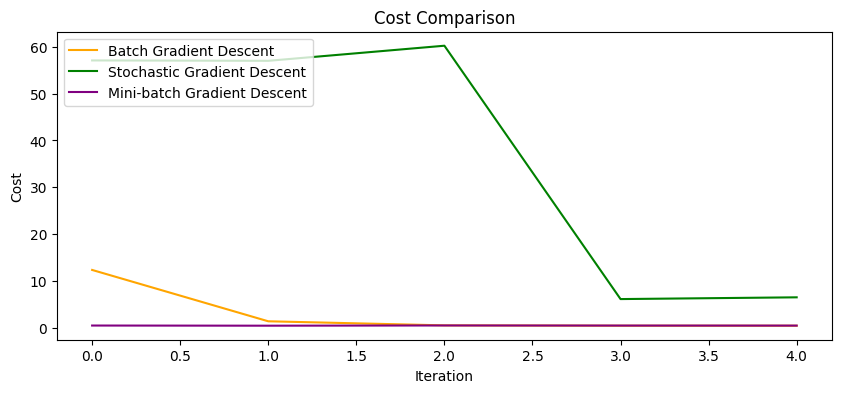

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(cost_bgd, color='orange', label="Batch Gradient Descent")
plt.plot(cost_sgd, color='green', label='Stochastic Gradient Descent')
plt.plot(cost_mbgd, color='purple', label='Mini-batch Gradient Descent')
plt.legend(loc="upper left")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Comparison')
plt.show()